# tf.data 

Explore the API's in tf.data Module

## Test Data

2


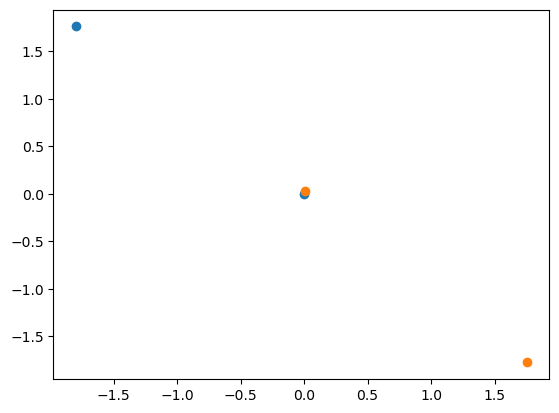

In [18]:
import math
import numpy as np     
import pandas as pd
import matplotlib.pyplot as plt

def randUniform(a, b):
  return np.random.rand() * (b - a) + a;

def make_spirals(n_samples,n_labels=2,noise=0.03,random_state=42):
    data = np.random.rand(n_samples,3)
    #print(data)
    samples_per_label = np.rint(n_samples/n_labels).astype(int)
    print(samples_per_label)
    idx = 0
    for i in range(n_labels):
        current_label = i
        current_index = idx
        if i == 0:
            deltaT = 0
        else:
            deltaT = math.pi
        for j in range(samples_per_label):
            data[idx][2] = current_label
            r = j / samples_per_label * 5;
            t = 1.75 * j / samples_per_label * 2 * math.pi + deltaT
            x = r * math.sin(t) + randUniform(-1, 1) * noise
            y = r * math.cos(t) + randUniform(-1, 1) * noise
            data[idx][0] = x
            data[idx][1] = y
            idx = idx + 1
            
    return data

d = make_spirals(5)
test_data = pd.DataFrame(d, columns = ['x','y','label'])
df_label_0 = test_data[test_data['label'] == 0.0]
df_label_1 = test_data[test_data['label'] == 1.0]
plt.scatter(df_label_0['x'],df_label_0['y'])
plt.scatter(df_label_1['x'],df_label_1['y'])

In [19]:
test_data.head()

,x,y,label
0,-0.004685,-0.000353,0.000000
1,-1.795526,1.760918,0.000000
2,0.003083,0.028615,1.000000
3,1.753666,-1.774305,1.000000
4,0.527746,0.054674,0.142496


In [20]:
test_data.shape

(5, 3)

## tf.data.Dataset

* create Source Dataset from your input data
* apply data transformation to preprocess the elements
* iterate over the dataset and process the elements - iteration happens in streaming fashion so that dataset does not need to fit in memory

### tf.data.Dataset.apply

Apply a transformation function on the dataset.

In [52]:
from tensorflow.data import Dataset

scaler = [1,2,3]
two_dimension = [[1,2,3],
                 [3,4,5],
                 [6,7,8]]

def apply_fn(ds):
    return ds.map(lambda x : x*x)

scaler_dataset = Dataset.from_tensor_slices(scaler)
new_scaler_dataset = scaler_dataset.apply(apply_fn)
print('apply map function on scaler set')
print(list(new_scaler_dataset.as_numpy_iterator()))
print('apply map function on two dimension dataset')
two_dimension_dataset = Dataset.from_tensor_slices(two_dimension)
new_two_dimension_dataset = two_dimension_dataset.apply(apply_fn)
print(list(new_two_dimension_dataset.as_numpy_iterator()))

apply map function on scaler set
[1, 4, 9]
apply map function on two dimension dataset
[array([1, 4, 9]), array([ 9, 16, 25]), array([36, 49, 64])]


### tf.data.Dataset.from_tensor_slices

The given tensor is sliced along their first dimension. This operation preserves the structure of the input tensors removing the first dimension. All input tensors must have the same size in their first dimensions.

In [43]:
import tensorflow as tf
from tensorflow.data import Dataset
# Slicing a 1D tensor produces scaler tensor elements
x = test_data['x'].tolist()
y = test_data['y'].tolist()
label = test_data['label'].tolist()
x_length = len(x)
print(f"input data length {x_length}")
scaler_dataset = Dataset.from_tensor_slices(x)
scaler_length = len(list(scaler_dataset.as_numpy_iterator()))
print(f"1D tensor transformed to scaler length {scaler_length}")
print("1D Slices")
print(list(scaler_dataset.as_numpy_iterator()))
# Slicing a 2D tensor produces 1D tensor elements.
one_dimension_dataset = Dataset.from_tensor_slices([x,y])
one_dimension_dataset_length = len(list(one_dimension_dataset.as_numpy_iterator()))
print(f"2D tensor transformed to 1D tensor of length {one_dimension_dataset_length}")
print("2D Slices")
print(list(one_dimension_dataset.as_numpy_iterator()))
# Slicing a 3D tensor produces 2D tensor elements
two_dimension_dataset = Dataset.from_tensor_slices([x,y,label])
two_dimension_dataset_length = len(list(two_dimension_dataset.as_numpy_iterator()))
print(f"3D tensor transformed to 2D tensor of length {two_dimension_dataset_length}")
print('3D Slices')
print(list(two_dimension_dataset.as_numpy_iterator()))
list(two_dimension_dataset.as_numpy_iterator())
# Slicing a tuple 
tuple_dataset = Dataset.from_tensor_slices((x,y))
print('tuple slices')
print(list(tuple_dataset.as_numpy_iterator()))

input data length 5
1D tensor transformed to scaler length 5
1D Slices
[-0.004684638, -1.7955257, 0.0030825175, 1.7536657, 0.527746]
2D tensor transformed to 1D tensor of length 2
2D Slices
[array([-0.00468464, -1.7955257 ,  0.00308252,  1.7536657 ,  0.527746  ],
      dtype=float32), array([-3.5304239e-04,  1.7609183e+00,  2.8614689e-02, -1.7743047e+00,
        5.4673862e-02], dtype=float32)]
3D tensor transformed to 2D tensor of length 3
3D Slices
[array([-0.00468464, -1.7955257 ,  0.00308252,  1.7536657 ,  0.527746  ],
      dtype=float32), array([-3.5304239e-04,  1.7609183e+00,  2.8614689e-02, -1.7743047e+00,
        5.4673862e-02], dtype=float32), array([0.        , 0.        , 1.        , 1.        , 0.14249589],
      dtype=float32)]
tuple slices
[(-0.004684638, -0.0003530424), (-1.7955257, 1.7609183), (0.0030825175, 0.028614689), (1.7536657, -1.7743047), (0.527746, 0.05467386)]


### tf.data.Dataset.repeat

In [59]:
dataset = tf.data.Dataset.from_tensor_slices(([1,2],[3,4]))
dataset = dataset.repeat(count=3)
list(dataset.as_numpy_iterator())

[(1, 3), (2, 4), (1, 3), (2, 4), (1, 3), (2, 4)]

### tf.data.Dataset.interleave

Allows for parallel execution for data preparation across multiple data sources or data sets and returns a single dataset.

* cycle_length - controls number of input elements that can be processed concurrently. Example 2 threads fighting for resources
* block_length - number of elements to consumer per iteration
* num_parallel_calls - how many elements which can run in parallel

In [68]:
dataset = Dataset.range(1, 3)  # ==> [ 1, 2, 3, 4, 5 ]

# with block length of 3,  3 elements are consumed first.
dataset = dataset.interleave(
  lambda x: Dataset.from_tensors(x).repeat(6),
    cycle_length=2, block_length=4)
list(dataset.as_numpy_iterator())

[1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2]

## tf.data.DatasetSpec

In [ ]:
import tensorflow as tf

In [ ]:
# create a dataset from tensor
data = tf.constant([10,10])
dataset = tf.data.Dataset.from_tensors(data)
dataset